In [1]:
! kaggle datasets download dnkumars/cybersecurity-intrusion-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset
License(s): MIT
  0% 0.00/261k [00:00<?, ?B/s]
100% 261k/261k [00:00<00:00, 92.4MB/s]


In [2]:
! unzip cybersecurity-intrusion-detection-dataset.zip

Archive:  cybersecurity-intrusion-detection-dataset.zip
  inflating: cybersecurity_intrusion_data.csv  


# About Dataset
1. The dataset consists of network-based and user behavior-based features. Each feature provides valuable information about potential cyber threats.
  * Network-Based Features
    1. network_peacket_size
      * represents the size of network packets, ranging between 64 to 1500 bytes.
      * Attackers may use abnormally small or large packets for reconnaissance exploitation
    2. protocol_type
      * The protocol used in the session: TCP, UDP or ICMP
        * TCP(Transmission Control Protocol)
          * Connection-Oriented: Establishes a connection between sender and receiver before data transmission.
          * Reliability: Provides error detection, retransmission of lost packets, and guarantees that data arrives in order.
          * Use Cases: Commonly used in applications where data accuracy is critical, such as web browsing(HTTP/HTTPS), email(SMTP), and file transfer(FTP).
        * UDP (User Datagram Protocol)
          * Connectionless: Sends packets(datagrams) without establishing a connection first, meaning there's no guarantee of delivery, order, or error recovery.
          * Low Overhead: Minimal protocol mechanism makes it faster and more efficient for real-time applications.
          * Use Cases: Ideal for applications where spped is more important than reliability, such as online gaming, live video streaming, and VoIP.
        * ICMP(Internet Control Message Protocol)
          * Control and Diagnostics: Primarily used for network diagnostics and error reporting. It communicates issues like unreachagle hosts, network congestion, or routing problems.
          * Network Tools: Underpins utilities like ping and traceroute, helping administrators determine network health and troubleshoot connectivity issues.
          * Operation: Not used for exchanging application data, but for sending control messages regarding the status of network operations.

    3. encryption_used (Encryption Protocol)
      * Values: AES, DES, None.
      * Both AES and DES are cryptographic algorithms used for symmetric encryption, meaning they use the same key for both encryption and decryption.
        * AES(Advanced Encryption Standard): commonly used
          * Key sizes: 128-bit, 192-bit, and 256-bit keys(much stronger than DES)
          * Block size: 128-bit block size
          * Algorithm: Uses a substitution-permutation network with 10, 12, or 14 rounds depending on the key size
        * DES(Data Encryption Standard): Older encryption, weaker security.
      * None: Indicates unencrypted communication, which can be risky.
      * Attackers might use no encryption to avoid detection or weak encryption to exploit vulnerabilities.

  * User Behavior-Based Features
    * Theses features track user activities, such as login attempts and session duration.
    1. login_attempts(Number of logins)
      * High values might idicate brute-force attacks
      * Typical users have 1-3 login attempts, whilte an attack may have hundreds or thousands.
    2. session_duration(Session Length in Seconds)
      * A very long session might indicate unauthorized access or persistence by an attacker
      * Attackers may try to stay connected to maintain access.
    3. failed_logins(Failed login attempts)
      * High failed login counts indicate credential stuffing or dictionary attacks.
      * Many failed attempts followed by a successful login could suggest and account was compromised.
    4. unusual_time_access(Login Time Anomaly)
      * A binary flag(0 or 1) indicating whether access happened at an unusual time.
      * Attackers often operate outside normal business hours to evade detection
    5. ip_reputation_score(Trustworthiness of IP Address)
      * A score from 0 to 1, where higher values indicate suspicious activity.
      * IP addresses associated with botnets, spam, or previous attacks tend to have higher scores.
    6. browser_type(User's Browser)
      * Common browsers: Chrome, Firefox, Edge, Safari
      * Unkown: Could be an indicator of automated scripts or bots.
  
2. Target variable(attack_detected)
  * Binary classification: 1 means an attack was detected, 0 means normal activity.
3. Possible use cases
  * This dataset can be used for intrusion detection systems(IDS) and cybersecurity research. Some key application include:
    1. Machine learning-Based Intrusion Detection
      * Supervised Learning Approaches
        * Classification Models(Logistic Regression, Decision Trees, Random Forest, XGBoost, SVM)
          * Train the model using labeled data(attack_detected as the target)
          * Evaluate using accuracy, percision, recall, F1-score
    2. Deep Learning Approaches
      * Use Neural Networks(DNN, LSTM, CNN) for pattern recognition
      * LSTM work well for time-series-based network traffic analysis
  * Anomaly Detection (Unsupervised learning)
    * If attack labels are missing, anomaly detection can be used
      * Autoencoders: Learn normal traffic and flag anomalies
      * Isolation Forest: Detects outliers based on feature isolation.
      * One-Class SVM: Learns normal behavior and detects deviations.
  * Rule Based Detection
    * If certain thresholds are met (e.g., failed_logins > 10 & ip_reputation_score > 0.8), an alert is triggered.


4. Challenges & Considerations
  * Adversarial Attacks: Attackes may modify traffic to evade detection
  * Concept Drift: Cyber threats evolve, requiring continuous model updates.
  * False Positive & False Negative: A balance between detecting real threats and avoiding unnecessary alerts.

      

In [ ]:
import pandas as pd
df = pd.read_csv('cybersecurity_intrusion_data.csv')
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


# Preprocessing

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


In [ ]:
# Remove irrelevant column 'session_id'
df = df.drop(columns=['session_id'])
df.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
import pandas as pd
# Apply OHE to data
# df = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)
df.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,0.438165,0.250000,0.068497,0.655587,0.2,0.0,1,True,False,True,True,False,False,False
1,0.334152,0.166667,0.216623,0.324443,0.0,0.0,0,True,False,True,False,True,False,False
2,0.462735,0.166667,0.010368,0.799160,0.4,0.0,1,True,False,True,False,False,False,False
3,0.606061,0.250000,0.083555,0.131015,0.0,0.0,1,False,True,True,False,False,False,True
4,0.318591,0.333333,0.073998,0.056820,0.2,0.0,0,True,False,False,False,True,False,False


# Feature engineering
1. Normalize/scale numerical features
2. Explore interactions between features, e.g., login_attempts vs. failed_logins

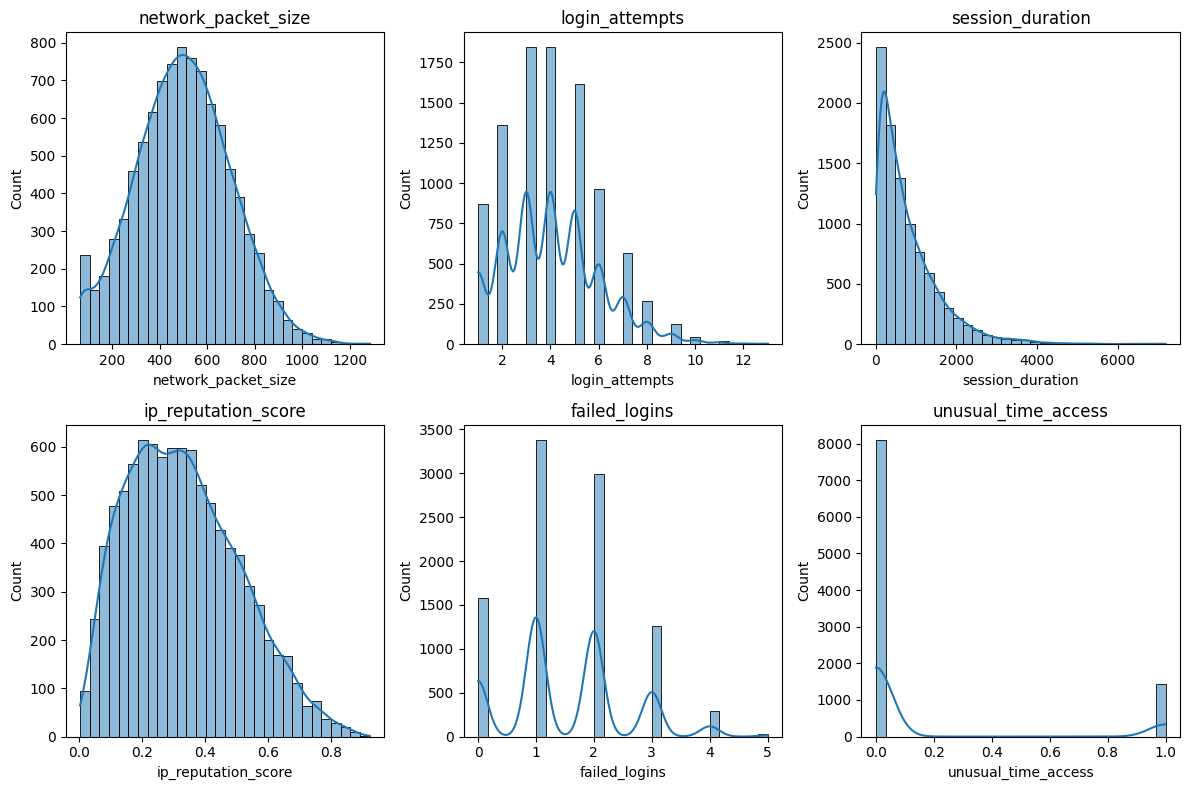

In [ ]:
# # First check if the dataset has normal distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_features = ['network_packet_size', 'login_attempts', 'session_duration',
                      'ip_reputation_score', 'failed_logins', 'unusual_time_access']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
# Perform Statistical Test, Shapiro-Wilk Test
from scipy.stats import shapiro

# Test each numerical feature for normality
for col in numerical_features:
  stat, p = shapiro(df[col])
  print(f'{col}" p-value = {p:.4f}')

# Interpretation:
# - If p-value > 0.05 → Data is **normally distributed**.
# - If p-value ≤ 0.05 → Data is **not normally distributed**.

network_packet_size" p-value = 0.0000
login_attempts" p-value = 0.0000
session_duration" p-value = 0.0000
ip_reputation_score" p-value = 0.0000
failed_logins" p-value = 0.0000
unusual_time_access" p-value = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9537.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Perform normaltest, anderson and kstest
from scipy.stats import normaltest, anderson, kstest
import numpy as np
# Interate over each numerical feature in the dataframe
for col in numerical_features:
  data = df[col]
  # D'Agostino and Pearson's Test
  stat_dagostino, p_dagostino = normaltest(df[col])

  # Kolmogorov-Smirnov Test(against normal distribution)
  stat_ks, p_ks = kstest(df[col], 'norm', args=(np.mean(df[col]), np.std(data)))

  # Anderson-Darling Test
  result_anderson = anderson(df[col], dist='norm')

  # Print Results
  print(f'\nFeature: {col}')
  print(f'D’Agostino and Pearson’s Test: p-value = {p_dagostino:.4f}')
  print(f'Kolmogorov-Smirnov Test: p-value = {p_ks:.4f}')
  print(f'Anderson-Darling Test: Statistic = {result_anderson.statistic:.4f}, Critical Values = {result_anderson.critical_values}')

    # Interpretation

  if p_dagostino > 0.05:
      print("D'Agostino: Data appears normally distributed")
  else:
      print("D'Agostino: Data does not appear normally distributed")

  if p_ks > 0.05:
      print("Kolmogorov-Smirnov: Data appears normally distributed")
  else:
      print("Kolmogorov-Smirnov: Data does not appear normally distributed")

  if result_anderson.statistic < result_anderson.critical_values[2]:  # Using 5% significance level
      print("Anderson-Darling: Data appears normally distributed")
  else:
      print("Anderson-Darling: Data does not appear normally distributed")


Feature: network_packet_size
D’Agostino and Pearson’s Test: p-value = 0.0000
Kolmogorov-Smirnov Test: p-value = 0.0497
Anderson-Darling Test: Statistic = 1.5495, Critical Values = [0.576 0.656 0.787 0.918 1.092]
D'Agostino: Data does not appear normally distributed
Kolmogorov-Smirnov: Data does not appear normally distributed
Anderson-Darling: Data does not appear normally distributed

Feature: login_attempts
D’Agostino and Pearson’s Test: p-value = 0.0000
Kolmogorov-Smirnov Test: p-value = 0.0000
Anderson-Darling Test: Statistic = 138.9026, Critical Values = [0.576 0.656 0.787 0.918 1.092]
D'Agostino: Data does not appear normally distributed
Kolmogorov-Smirnov: Data does not appear normally distributed
Anderson-Darling: Data does not appear normally distributed

Feature: session_duration
D’Agostino and Pearson’s Test: p-value = 0.0000
Kolmogorov-Smirnov Test: p-value = 0.0000
Anderson-Darling Test: Statistic = 426.1106, Critical Values = [0.576 0.656 0.787 0.918 1.092]
D'Agostino: D

In [ ]:
# Scale dataset with MinMaxScaler since data does not have normal distribution
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0.438165,TCP,0.250000,0.068497,DES,0.655587,0.2,Edge,0.0,1
1,0.334152,TCP,0.166667,0.216623,DES,0.324443,0.0,Firefox,0.0,0
2,0.462735,TCP,0.166667,0.010368,DES,0.799160,0.4,Chrome,0.0,1
3,0.606061,UDP,0.250000,0.083555,DES,0.131015,0.0,Unknown,0.0,1
4,0.318591,TCP,0.333333,0.073998,AES,0.056820,0.2,Firefox,0.0,0


## Exploring Feature Interactions
1. Correlation Matrix(Identifies Linear Relationships)
2. Pairwise Feature Interactions (Scatter Plots)
3. Feature Combinations (New Interaction Features)

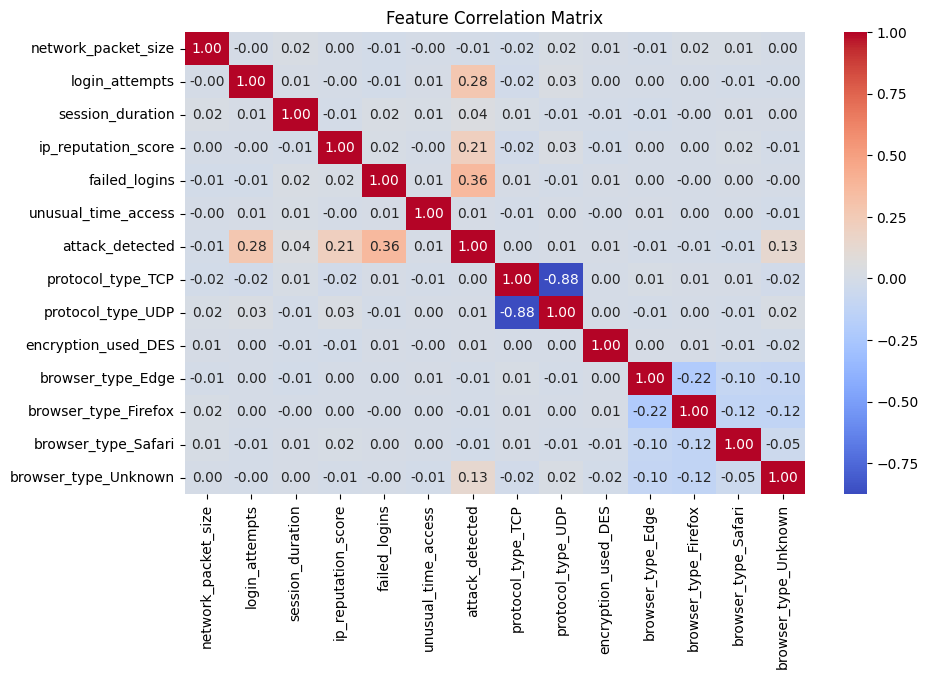

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


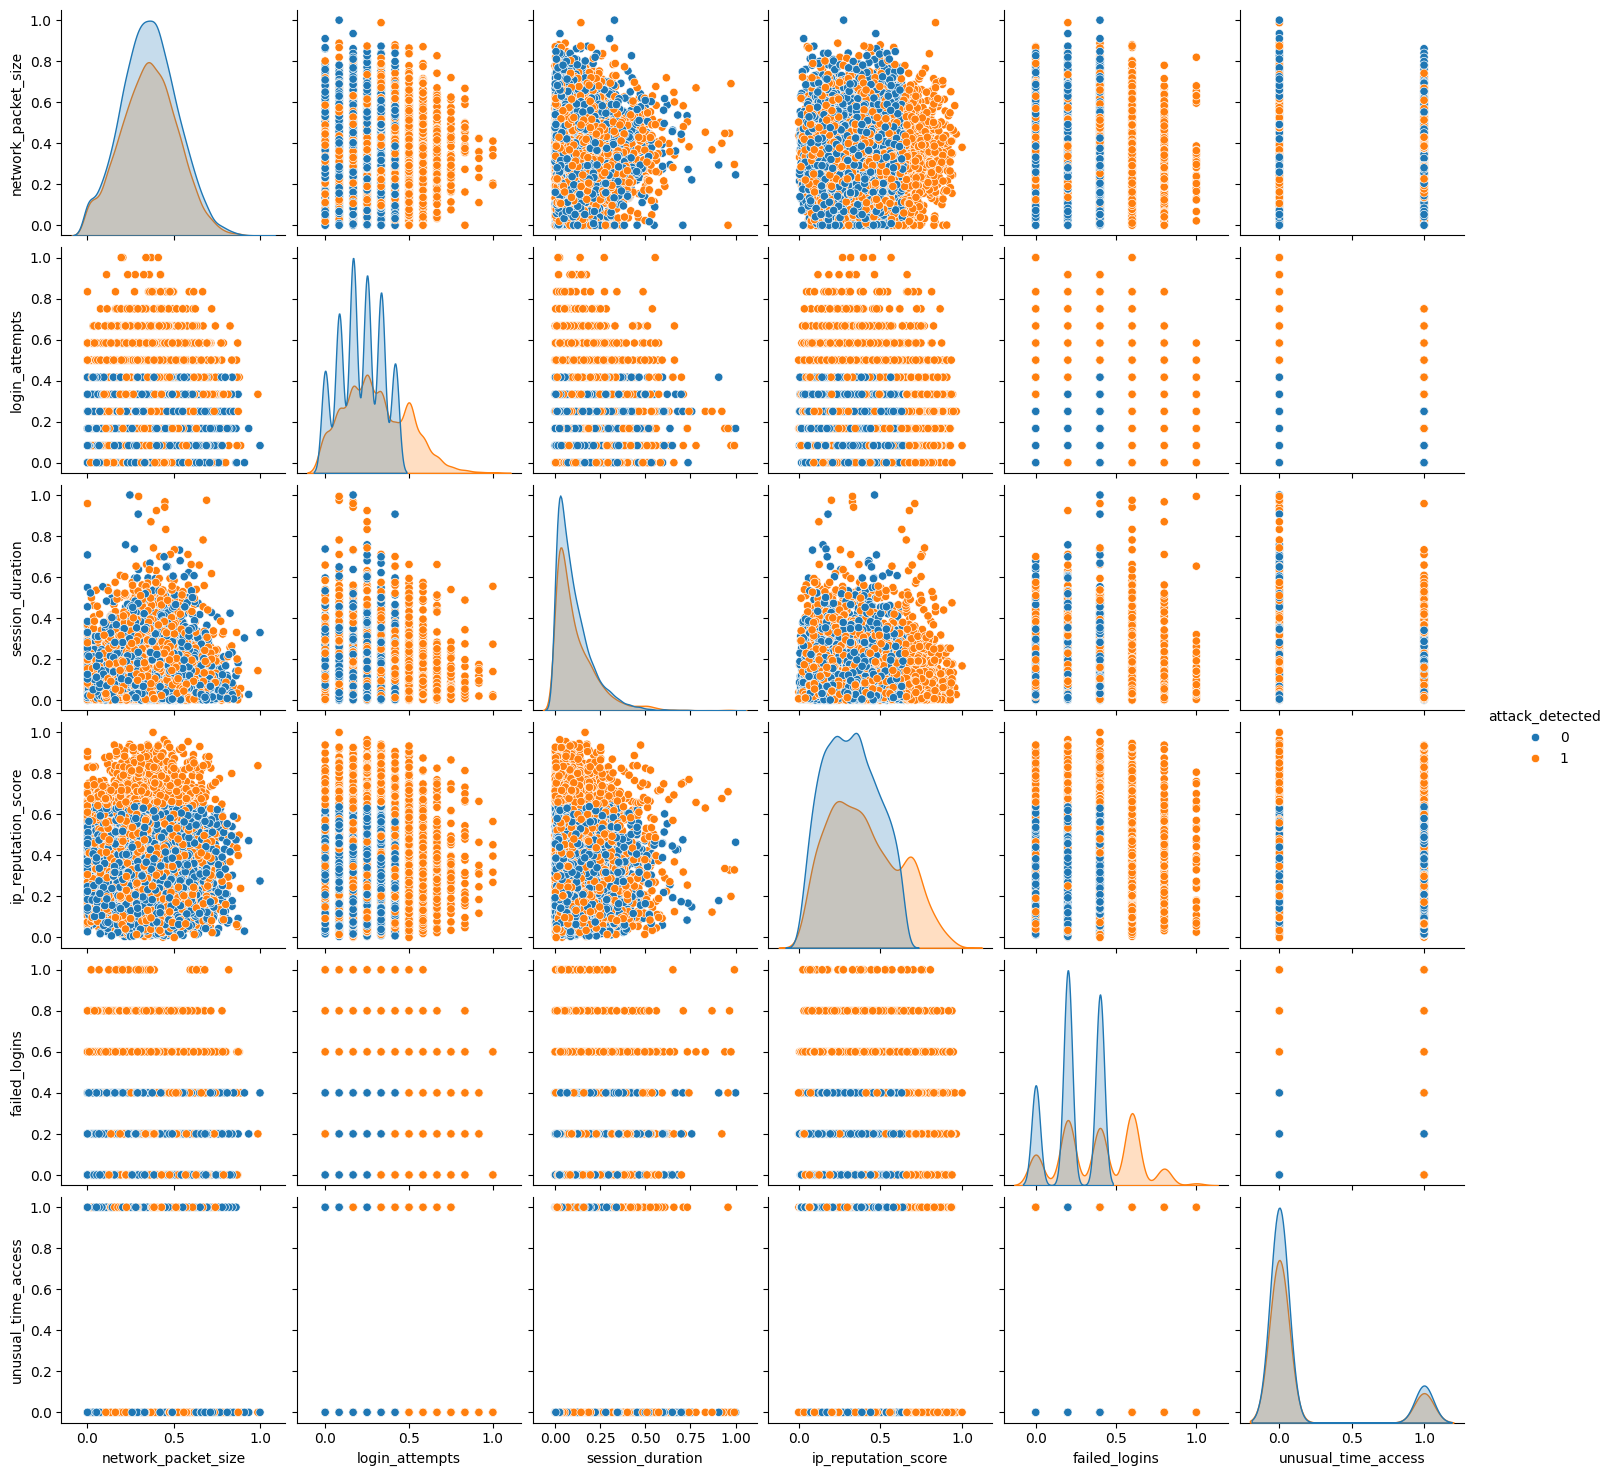

In [ ]:
# Create pairplot to visualize interactions between numerical features
sns.pairplot(df.select_dtypes(include=['number']), hue="attack_detected", diag_kind="kde")
plt.show()

# # Create new interaction features
# df["packet_duration"] = df["network_packet_size"] * df["session_duration"]
# df["failed_login_ratio"] = df["failed_logins"] / (df["login_attempts"] + 1)  # Avoid division by zero


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Separate features and target variable
X = df.drop(columns=["attack_detected"])  # Features
y = df["attack_detected"]  # Target variable

# Convert categorical variables to numerical using label encoding
X_encoded = X.copy()
categorical_features = X.select_dtypes(include=['object']).columns

for col in categorical_features:
    X_encoded[col] = X_encoded[col].astype("category").cat.codes

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

# Create a DataFrame to display results
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores}).sort_values(by="MI Score", ascending=False)

print(mi_df)

                 Feature  MI Score
4          failed_logins  0.156578
1         login_attempts  0.094216
3    ip_reputation_score  0.068250
12  browser_type_Unknown  0.008595
11   browser_type_Safari  0.004810
10  browser_type_Firefox  0.004765
5    unusual_time_access  0.003722
2       session_duration  0.000707
9      browser_type_Edge  0.000129
0    network_packet_size  0.000000
6      protocol_type_TCP  0.000000
7      protocol_type_UDP  0.000000
8    encryption_used_DES  0.000000


# Model selection
1. Tranditional ML: Logistic Regression, Random Forest, XGBoost, SVM
2. Deep learning: Neural Network(using Tensorflow/Pytorch)


# Deep Neural Network(DNN)
* A Deep Neural Network(DNN) is a type of artificial neural network with multiple layers between the input and output layers. It is used for complex machine learning tasks such as image recognition, natural language processing, and autonomous systems.

## Structure of DNN
1. Input Layer
  * Receives the raw data
  * Passes the information to the next layer
2. Hidden Layers(Multiple layers)
  * Each layer consists of neurons (nodes) that process and transform data using activation function(like ReLU, Sigmoid, or Tanh)
  * The deeper the network (more hidden layers), the more complex patterns it can learn
  * Uses weights and biases, which are adjusted during training to optimize performance.
3. Output Layer
  * Produces the final result, such as a classification label(e.g., 'cat' or 'dog') or a numerical prediction


# Key Features of DNNs
* Deep learning approach: DNNs use multiple hidden layers to learn hierarchical representations of data
* Feature Extraction: Unlike traditional machine learning, which relies on handcrafted features, DNNs automatically learn relevant features from data
* Backpropagation & Optimization: Uses backpropagation with gradient descent to update weights and minimize error.
* Non-Linearity: Activation function introduce non-linearity, allowing the network to learn complex patterns.

## Types of Deep Neural Networks
1. Feedforward Neural Network (FNN) - Information moves in one direction, from input to output (no loops)
2. Convolutional Neural Network (CNN) - Specialized for image processing using filters and feature maps
3. Recurrent Neural Network (RNN) - Designed for sequential data like speech and time series, with connections allowing memory.
4. Transformers - Advanced architecture used in NLP tasks like GPT and BERT, improving sequence learning.
5. Generative Adversarial Networks (GANs) - Used for generating realistic images, deepfakes, and data synthesis

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM and RNN (3D input: samples, time steps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Function to create a DNN model
def create_dnn_model(input_shape):
  model = Sequential([
      Dense(64, activation='relu', input_shape=(input_shape,)),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid') # Binary Classification
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Initialize model
dnn_model = create_dnn_model(X_train.shape[1])

# Train DNN model
print('\nTraining DNN model...')
dnn_history = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


# Evaluate model
dnn_eval = dnn_model.evaluate(X_test, y_test, verbose=0)

# Display result
print('\nModel Performance:')
print(f'DNN Accuracy: {dnn_eval[1]:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training DNN model...
Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6298 - loss: 0.6444 - val_accuracy: 0.7049 - val_loss: 0.5642
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7298 - loss: 0.5355 - val_accuracy: 0.7201 - val_loss: 0.5514
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7527 - loss: 0.5155 - val_accuracy: 0.7327 - val_loss: 0.5320
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7685 - loss: 0.4819 - val_accuracy: 0.7783 - val_loss: 0.4948
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4599 - val_accuracy: 0.8202 - val_loss: 0.4490
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8346 - loss: 0.4119 - val_accuracy: 0.8344 - val_loss: 0.4163
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8534 - loss: 0.3851 - val_accuracy: 0.8527 - val_loss: 0.4099
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8618 - loss: 0.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Function to create a DNN model
def create_dnn_model(input_shape):
  model = Sequential([
      Dense(64, activation='relu', input_shape=(input_shape,)),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid') # Binary Classification
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Initialize model
dnn_model = create_dnn_model(X_train_smote.shape[1])

# Train DNN model
print('\nTraining DNN model...')
dnn_history = dnn_model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


# Evaluate model
dnn_eval = dnn_model.evaluate(X_test, y_test, verbose=0)

# Display result
print('\nModel Performance:')
print(f'DNN Accuracy: {dnn_eval[1]:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training DNN model...
Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6257 - loss: 0.6480 - val_accuracy: 0.6965 - val_loss: 0.5674
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7322 - loss: 0.5316 - val_accuracy: 0.7206 - val_loss: 0.5436
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7408 - loss: 0.5117 - val_accuracy: 0.7448 - val_loss: 0.5163
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7665 - loss: 0.4822 - val_accuracy: 0.7584 - val_loss: 0.4842
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.4457 - val_accuracy: 0.8077 - val_loss: 0.4379
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.4186 - val_accuracy: 0.8260 - val_loss: 0.4123
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8462 - loss: 0.3909 - val_accuracy: 0.8391 - val_loss: 0.3983
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8539 - loss: 0.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the dataset
file_path = "/content/cybersecurity_intrusion_data.csv"  # Change this to your dataset path
df = pd.read_csv(file_path)

# Drop 'session_id' if present
if 'session_id' in df.columns:
    df.drop(columns=['session_id'], inplace=True)

# One-hot encode categorical variables
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define target variable
y = df["attack_detected"]
X = df.drop(columns=["attack_detected"])

# Scale numerical features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data for LSTM and RNN (3D input: samples, time steps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Function to create a DNN model
def create_dnn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=(1, input_shape), activation='relu', return_sequences=True),
        LSTM(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(64, input_shape=(1, input_shape), activation='relu', return_sequences=True),
        SimpleRNN(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize models
dnn_model = create_dnn_model(X_train.shape[1])
lstm_model = create_lstm_model(X_train.shape[1])
rnn_model = create_rnn_model(X_train.shape[1])

# Train DNN model
print("\nTraining DNN Model...")
dnn_history = dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Train LSTM model
print("\nTraining LSTM Model...")
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Train RNN model
print("\nTraining RNN Model...")
rnn_history = rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluate models
dnn_eval = dnn_model.evaluate(X_test, y_test, verbose=0)
lstm_eval = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
rnn_eval = rnn_model.evaluate(X_test_reshaped, y_test, verbose=0)

# Display results
print("\nModel Performance:")
print(f"DNN Accuracy: {dnn_eval[1]:.4f}")
print(f"LSTM Accuracy: {lstm_eval[1]:.4f}")
print(f"RNN Accuracy: {rnn_eval[1]:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training DNN Model...
Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6231 - loss: 0.6546 - val_accuracy: 0.6908 - val_loss: 0.5807
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7030 - loss: 0.5743 - val_accuracy: 0.7280 - val_loss: 0.5450
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7382 - loss: 0.5299 - val_accuracy: 0.7505 - val_loss: 0.5227
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7483 - loss: 0.5174 - val_accuracy: 0.7783 - val_loss: 0.4900
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - loss: 0.4846 - val_accuracy: 0.8071 - val_loss: 0.4600
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7953 - loss: 0.4561 - val_accuracy: 0.8134 - val_loss: 0.4375
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.4486 - val_accuracy: 0.8328 - val_loss: 0.4171
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8219 - loss: 0.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/cybersecurity_intrusion_data.csv"  # Change this to your dataset file
df = pd.read_csv(file_path)

# Drop session_id if exists
if 'session_id' in df.columns:
    df.drop(columns=['session_id'], inplace=True)

# Encode categorical variables
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Normalize numerical features (GANs work best with data in range [-1, 1])
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Define feature set (excluding attack_detected, as GAN will generate all features)
X_real = df_scaled.drop(columns=["attack_detected"])

# Split dataset into training and test sets
X_train, X_test = train_test_split(X_real, test_size=0.2, random_state=42)

# Define GAN parameters
latent_dim = 100  # Size of random noise vector

# Define the Generator
def build_generator():
    model = Sequential([
        Dense(64, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(X_train.shape[1], activation='tanh')  # Output matches feature size
    ])
    return model

# Define the Discriminator
def build_discriminator():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1]),
        LeakyReLU(alpha=0.2),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')  # Binary classification: real or fake
    ])
    model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Generator and Discriminator
generator = build_generator()
discriminator = build_discriminator()

# Define GAN Model
discriminator.trainable = False  # Freeze discriminator while training GAN

gan = Sequential([generator, discriminator])
gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Training the GAN
epochs = 5000
batch_size = 32

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_samples = X_train.iloc[idx].values
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_samples = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))  # Label 1 for real
    fake_labels = np.zeros((batch_size, 1))  # Label 0 for fake

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))  # Fool discriminator into believing these are real

    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss[0]:.4f}, G Loss: {g_loss:.4f}")

# Generate synthetic cybersecurity data
num_samples = 1000
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_data = generator.predict(noise)

# Convert back to original scale
generated_data_rescaled = scaler.inverse_transform(generated_data)

# Convert to DataFrame
synthetic_df = pd.DataFrame(generated_data_rescaled, columns=X_real.columns)

# Save synthetic data
synthetic_df.to_csv("synthetic_cybersecurity_data.csv", index=False)
print("\nSynthetic cybersecurity data saved as 'synthetic_cybersecurity_data.csv'")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

ValueError: operands could not be broadcast together with shapes (1000,13) (14,) (1000,13) 


Applying K-Means Clustering...
K-Means Silhouette Score: 0.7979


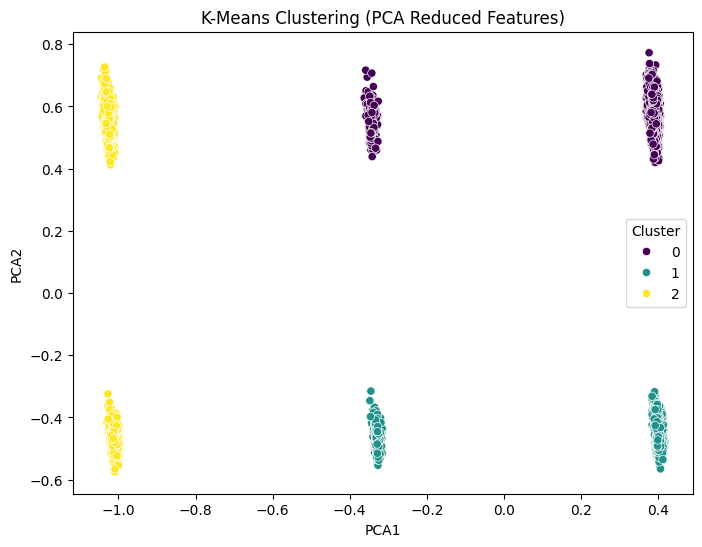


Applying DBSCAN for Anomaly Detection...


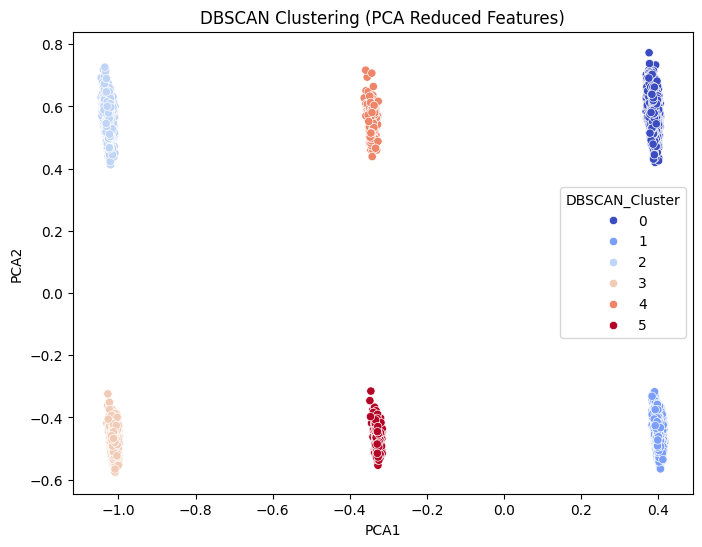


Applying Isolation Forest for Intrusion Detection...

Anomaly detection results saved as 'cybersecurity_anomaly_detection.csv'


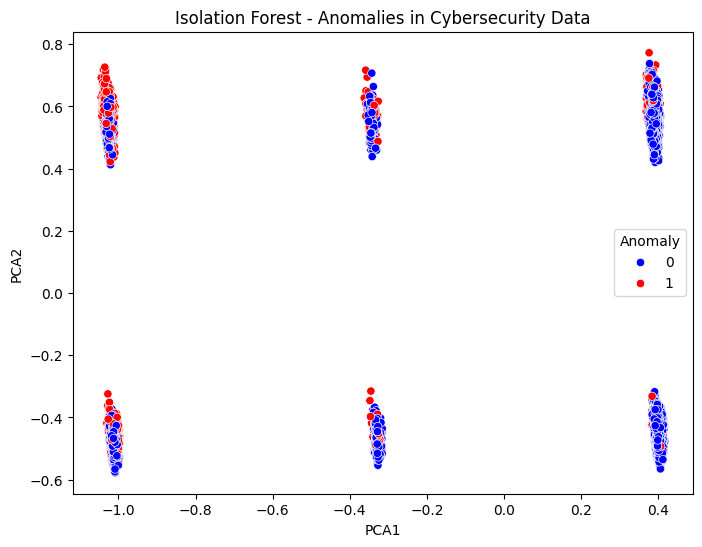

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "/content/cybersecurity_intrusion_data.csv"  # Change this to your dataset file
df = pd.read_csv(file_path)

# Drop 'session_id' if present
if 'session_id' in df.columns:
    df.drop(columns=['session_id'], inplace=True)

# One-hot encode categorical variables
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Scale numerical features for better clustering
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply PCA for dimensionality reduction (optional but improves clustering)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])

# ------------------------------ #
# 🏷️ 1️⃣ K-Means Clustering
# ------------------------------ #
print("\nApplying K-Means Clustering...")
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
df_pca["Cluster"] = kmeans.fit_predict(df_pca)

# Evaluate clustering quality
silhouette = silhouette_score(df_pca.drop(columns=["Cluster"]), df_pca["Cluster"])
print(f"K-Means Silhouette Score: {silhouette:.4f}")

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"], hue=df_pca["Cluster"], palette="viridis")
plt.title("K-Means Clustering (PCA Reduced Features)")
plt.show()

# ------------------------------ #
# 🏷️ 2️⃣ DBSCAN (Density-Based Clustering)
# ------------------------------ #
print("\nApplying DBSCAN for Anomaly Detection...")
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust parameters as needed
df_pca["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca.drop(columns=["Cluster"]))

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"], hue=df_pca["DBSCAN_Cluster"], palette="coolwarm")
plt.title("DBSCAN Clustering (PCA Reduced Features)")
plt.show()

# ------------------------------ #
# 🏷️ 3️⃣ Isolation Forest (Anomaly Detection)
# ------------------------------ #
print("\nApplying Isolation Forest for Intrusion Detection...")
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df_scaled)

# Convert anomaly labels (-1 = anomaly, 1 = normal) to (0 = normal, 1 = attack)
df["Anomaly"] = df["Anomaly"].apply(lambda x: 1 if x == -1 else 0)

# Save anomaly detection results
df.to_csv("cybersecurity_anomaly_detection.csv", index=False)
print("\nAnomaly detection results saved as 'cybersecurity_anomaly_detection.csv'")

# Visualize Anomaly Detection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PCA1"], y=df_pca["PCA2"], hue=df["Anomaly"], palette={0: "blue", 1: "red"})
plt.title("Isolation Forest - Anomalies in Cybersecurity Data")
plt.show()
